<a href="https://colab.research.google.com/github/koushik2299/Data-Science/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to connect the dataset from kaggle directly to our notebook 

In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import zipfile
from google.colab import files

#upload the kaggle json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sweetkoushik","key":"a20cb923127cb9b4bc25697ec8a80294"}'}

## Main Block on connecting with kaggle 

In [10]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!kaggle datasets download -d sdk1810/playtennis

  0% 0.00/291 [00:00<?, ?B/s]
100% 291/291 [00:00<00:00, 125kB/s]


## How to extract zip files from the folder

In [12]:
with zipfile.ZipFile('/content/playtennis.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Decision Trees 

## Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn.preprocessing import LabelEncoder

## Pre Processing

In [16]:
df=pd.read_csv("/content/PlayTennis.csv")

In [17]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [18]:
df.isna().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

Converting Categorical Columns into Numerical Through Label Encoding 

In [20]:
#Create Object from LabelEncoder
label_En = LabelEncoder()

df['outlook']= label_En.fit_transform(df['outlook'])
df['temp']=label_En.fit_transform(df['temp'])
df['humidity']=label_En.fit_transform(df['humidity'])
df['windy']=label_En.fit_transform(df['windy'])
df['play']=label_En.fit_transform(df['play'])

In [21]:
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [22]:
X = df.drop(['play'] , axis=1 )
Y = df['play']

In [23]:
from sklearn.model_selection import train_test_split
x_train  , x_test, y_train, y_test =train_test_split(X ,Y , test_size=0.3 ,stratify=Y ,random_state=101)

In [24]:
from sklearn.tree import DecisionTreeClassifier

## Modelling

In [25]:
#Create Object from Decision Tree Classifier
D_T_C_Model =DecisionTreeClassifier(criterion='entropy' ,random_state=10)

In [26]:
D_T_C_Model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [27]:
#check training score
D_T_C_Model.score(x_train , y_train)

1.0

In [28]:
#check testing score
D_T_C_Model.score(x_test , y_test)

0.4

## Viz the Tree

[Text(0.5, 0.875, 'x[3] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'x[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

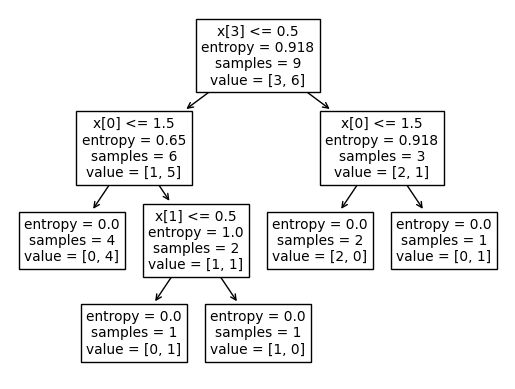

In [29]:
#visualize the tree using tree.plot_tree
from sklearn import tree
tree.plot_tree(D_T_C_Model)

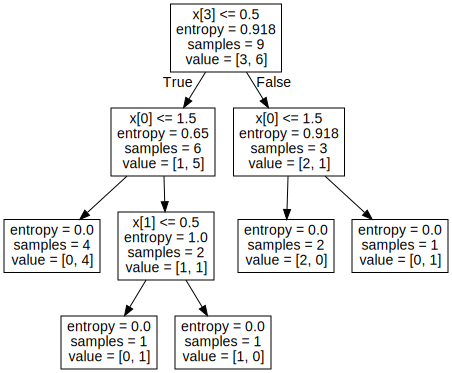

In [30]:
#Graphviz
import graphviz
graph_data = tree.export_graphviz(D_T_C_Model, out_file=None) 
graph = graphviz.Source(graph_data) 
graph

## Model Performance

In [31]:
#Check Accurcy score(y_test , y_pred)
from sklearn.metrics import accuracy_score

In [33]:
y_pred=D_T_C_Model.predict(x_test)
accuracy_score(y_test , y_pred)

0.4